In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Models
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
from lazypredict.Supervised import LazyRegressor

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [315]:
f = r"/home/subash/Desktop/Nepal-Homes-master/cleaned_data.csv"
df = pd.read_csv(f)
df.shape

(1056, 18)

In [316]:
df.head()

,slug_url,title,built_year,is_featured,is_premium,floors,bedroom,bathroom,is_price_on_call,price_type,road_access,property_face,state,district,city,area,area_sq_ft,amount
0,house-on-sale-in-badeli-budhanilkantha,"House on sale in Badeli, Budhanilkantha",nan,False,False,2.50,4.00,3.00,False,Total Amount,13.00,West,Bagmati State,Kathmandu,Budhanilkantha Municipality,Badeli,1711.25,26000000.00
1,house-for-sale-at-bafal-NH12626,House for sale at Bafal,nan,False,False,3.50,17.00,4.00,False,Total Amount,16.50,South,Bagmati State,Kathmandu,Kathmandu Metropolitan City,Bafal,1882.37,46000000.00
2,house-for-sale-in-bafal,House for sale in Bafal,nan,False,False,2.50,nan,3.00,True,Total Amount,13.00,North,Bagmati State,Kathmandu,Kathmandu Metropolitan City,Bafal,1540.12,nan
3,house-for-sale-in-bafal-NH12343,House for sale in Bafal,nan,False,False,2.50,nan,nan,False,Total Amount,13.00,NaN,Bagmati State,Kathmandu,Kathmandu Metropolitan City,Bafal,1540.12,25500000.00
4,mini-bungalow-house-on-sale-at-bafal-NH12313,Mini bungalow house on sale at Bafal,nan,False,False,2.50,6.00,4.00,False,Total Amount,14.00,NaN,Bagmati State,Kathmandu,Kathmandu Metropolitan City,Bafal,1369.00,30000000.00


In [317]:
df.isnull().sum()

slug_url             45
title                45
built_year          934
is_featured          45
is_premium           45
floors              197
bedroom             360
bathroom            405
is_price_on_call     88
price_type           45
road_access         179
property_face       569
state                 0
district              0
city                 45
area                  0
area_sq_ft           35
amount               67
dtype: int64

# Handling Missing Values
## Imputation

In [318]:
df.drop(["built_year","title","is_price_on_call","property_face","slug_url","road_access","price_type","is_premium","is_featured"],axis=1, inplace=True)

In [319]:
df.head()
# df.shape

,floors,bedroom,bathroom,state,district,city,area,area_sq_ft,amount
0,2.50,4.00,3.00,Bagmati State,Kathmandu,Budhanilkantha Municipality,Badeli,1711.25,26000000.00
1,3.50,17.00,4.00,Bagmati State,Kathmandu,Kathmandu Metropolitan City,Bafal,1882.37,46000000.00
2,2.50,nan,3.00,Bagmati State,Kathmandu,Kathmandu Metropolitan City,Bafal,1540.12,nan
3,2.50,nan,nan,Bagmati State,Kathmandu,Kathmandu Metropolitan City,Bafal,1540.12,25500000.00
4,2.50,6.00,4.00,Bagmati State,Kathmandu,Kathmandu Metropolitan City,Bafal,1369.00,30000000.00


In [320]:
df.isnull().sum()

floors        197
bedroom       360
bathroom      405
state           0
district        0
city           45
area            0
area_sq_ft     35
amount         67
dtype: int64

In [321]:
df[df.isnull()["area"]]

,floors,bedroom,bathroom,state,district,city,area,area_sq_ft,amount


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   floors      859 non-null    float64
 1   bedroom     696 non-null    float64
 2   bathroom    651 non-null    float64
 3   state       1056 non-null   object 
 4   district    1056 non-null   object 
 5   city        1011 non-null   object 
 6   area        1056 non-null   object 
 7   area_sq_ft  1021 non-null   float64
 8   amount      989 non-null    float64
dtypes: float64(5), object(4)
memory usage: 74.4+ KB


In [323]:
df

,floors,bedroom,bathroom,state,district,city,area,area_sq_ft,amount
0,2.50,4.00,3.00,Bagmati State,Kathmandu,Budhanilkantha Municipality,Badeli,1711.25,26000000.00
1,3.50,17.00,4.00,Bagmati State,Kathmandu,Kathmandu Metropolitan City,Bafal,1882.37,46000000.00
2,2.50,nan,3.00,Bagmati State,Kathmandu,Kathmandu Metropolitan City,Bafal,1540.12,nan
3,2.50,nan,nan,Bagmati State,Kathmandu,Kathmandu Metropolitan City,Bafal,1540.12,25500000.00
4,2.50,6.00,4.00,Bagmati State,Kathmandu,Kathmandu Metropolitan City,Bafal,1369.00,30000000.00
...,...,...,...,...,...,...,...,...,...
1051,nan,3.00,3.00,Bagmati State,Lalitpur,NaN,Sanepa,2000.00,150000.00
1052,nan,0.00,1.00,Bagmati State,Kathmandu,NaN,Tebahal,620.00,40000.00
1053,nan,5.00,2.00,Bagmati State,Lalitpur,NaN,Tikathali,400.00,20000000.00
1054,nan,3.00,2.00,Bagmati State,Kathmandu,NaN,Tokha,1514.00,80000.00


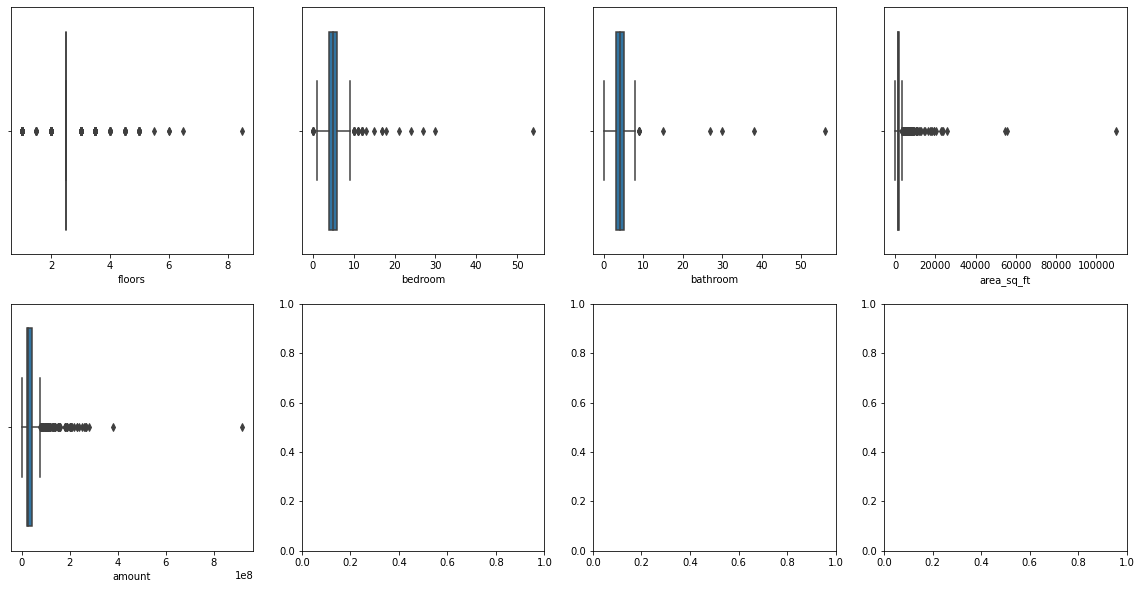

In [324]:
    num = df.select_dtypes(include=np.number).columns

    fig, axes = plt.subplots(2,4,figsize=(20,10))

    for i,col in enumerate(num):
        sns.boxplot(df[col],ax=axes[int(i/4),int(i % 4)])

In [325]:
num

Index(['floors', 'bedroom', 'bathroom', 'area_sq_ft', 'amount'], dtype='object')

# Outlier Removal

In [326]:
def outlier_removal(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    iqr_dist = 3.5
    return df[(df[col] > q1 - iqr_dist*iqr) & (df[col] < q3+iqr_dist*iqr)]

In [327]:
for col in df.select_dtypes(include=np.number).columns:
    if not col in ["floors","bathroom"]:
        df = outlier_removal(df,col)
df = df[df.bathroom < 20]

In [328]:
num_df = df.select_dtypes(include=np.number)
# num_df

In [ ]:
# # Log transform
# for col in num_df.columns:
#     if not'is' in col:
#         num_df[col] = np.log(num_df[col])

In [329]:
num_df

,floors,bedroom,bathroom,area_sq_ft,amount
0,2.50,4.00,3.00,1711.25,26000000.00
4,2.50,6.00,4.00,1369.00,30000000.00
7,2.50,5.00,3.00,1326.21,31000000.00
11,2.50,5.00,4.00,1540.12,36000000.00
12,2.50,4.00,3.00,1540.12,35000000.00
...,...,...,...,...,...
1051,nan,3.00,3.00,2000.00,150000.00
1052,nan,0.00,1.00,620.00,40000.00
1053,nan,5.00,2.00,400.00,20000000.00
1054,nan,3.00,2.00,1514.00,80000.00


# Feature Selection

<AxesSubplot:>

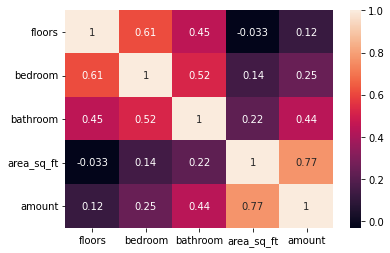

In [330]:
sns.heatmap(num_df.corr(),annot=True)

In [331]:
interest_df = pd.concat([df[["area"]],num_df],axis=1)

In [332]:
interest_df_new = interest_df.drop(['floors',],axis='columns')


In [333]:
interest_df_new

,area,bedroom,bathroom,area_sq_ft,amount
0,Badeli,4.00,3.00,1711.25,26000000.00
4,Bafal,6.00,4.00,1369.00,30000000.00
7,Bafal,5.00,3.00,1326.21,31000000.00
11,Bafal,5.00,4.00,1540.12,36000000.00
12,Bafal,4.00,3.00,1540.12,35000000.00
...,...,...,...,...,...
1051,Sanepa,3.00,3.00,2000.00,150000.00
1052,Tebahal,0.00,1.00,620.00,40000.00
1053,Tikathali,5.00,2.00,400.00,20000000.00
1054,Tokha,3.00,2.00,1514.00,80000.00


In [354]:
df_no_area = interest_df_new.drop(['area',],axis='columns')

In [355]:
one_hot = pd.get_dummies(interest_df_new.area)
one_hot.head()

,Aakase Dhara,Badeli,Bafal,Bageshwori,Baghdol,Balaju,Balambu,Balkhu,Balkot,Balkumari,...,Thapagaun,Thapathali,Thasikhel,Thecho,Thimi,Thulobharyang,Tikathali,Tinkune,Tokha,sitapaila
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [356]:
# interest_df_new = pd.concat(one_hot)
encoded_df = df_no_area.join(one_hot)

encoded_df.head()

,bedroom,bathroom,area_sq_ft,amount,Aakase Dhara,Badeli,Bafal,Bageshwori,Baghdol,Balaju,...,Thapagaun,Thapathali,Thasikhel,Thecho,Thimi,Thulobharyang,Tikathali,Tinkune,Tokha,sitapaila
0,4.00,3.00,1711.25,26000000.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.00,4.00,1369.00,30000000.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5.00,3.00,1326.21,31000000.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,5.00,4.00,1540.12,36000000.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,4.00,3.00,1540.12,35000000.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [357]:
X = encoded_df.drop("amount",axis='columns')
print(X)

      bedroom  bathroom  area_sq_ft  Aakase Dhara  Badeli  Bafal  Bageshwori  \
0        4.00      3.00     1711.25             0       1      0           0   
4        6.00      4.00     1369.00             0       0      1           0   
7        5.00      3.00     1326.21             0       0      1           0   
11       5.00      4.00     1540.12             0       0      1           0   
12       4.00      3.00     1540.12             0       0      1           0   
...       ...       ...         ...           ...     ...    ...         ...   
1051     3.00      3.00     2000.00             0       0      0           0   
1052     0.00      1.00      620.00             0       0      0           0   
1053     5.00      2.00      400.00             0       0      0           0   
1054     3.00      2.00     1514.00             0       0      0           0   
1055     4.00      2.00       35.00             0       0      0           0   

      Baghdol  Balaju  Balambu  ...  Th

In [358]:
Y = interest_df_new["amount"]
print(Y)

0      26000000.00
4      30000000.00
7      31000000.00
11     36000000.00
12     35000000.00
           ...    
1051     150000.00
1052      40000.00
1053   20000000.00
1054      80000.00
1055   13200000.00
Name: amount, Length: 503, dtype: float64


In [359]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [360]:
print(X.shape,X_train.shape,X_test.shape)

(503, 181) (402, 181) (101, 181)


In [361]:
#XGBoost Regressor
from xgboost import XGBRegressor

model = XGBRegressor()

In [362]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [363]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [364]:
print(training_data_prediction)

[19667850.  30109082.  94731410.   2116189.2 52988630.  28602438.
 16095905.  35200844.    801005.9 33761684.  30243200.  33496742.
 21388158.  37949772.  15762004.  19121684.  23252886.  11676461.
 25253750.  19200856.  27315002.  28224856.  26932740.  20924420.
 26492274.  28307654.  32900494.  34770444.  16069857.  25458738.
 23384536.  39209750.  25620360.  17448240.    918844.2 23523004.
 34367150.  38731164.  26589260.  34915148.  25926266.  42677756.
 21801238.  70007590.  35045820.  40512212.  34700980.  39538424.
 24863826.  19621234.  13174300.  49225400.  10830460.  23523004.
 15299916.  37739696.  10527137.  52117410.  23599028.  25429880.
 25671190.  25834806.  38880010.  42438250.  72123816.  21247470.
 19606874.  19606874.  25671190.   2752492.8 35533536.  29272614.
 20769004.  14056519.  25539794.  25539794.  47093108.  19631536.
 69478840.  28468820.  77727150.  77466400.  19423216.  67287760.
 17437774.  60878116.  18648922.  56999130.    617347.5 33441500.
 62956590.

In [369]:
# R squared error
from sklearn import metrics

score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9798635430818365
Mean Absolute Error :  1933635.8142973615


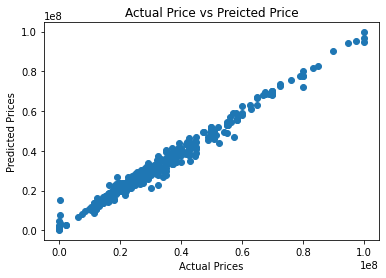

In [370]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [371]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [372]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.6302157445977177
Mean Absolute Error :  6109102.349606564


In [387]:
def predict_price(area, area_sq_ft, bathroom, bedroom):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = area_sq_ft
    x[1] = bathroom
    x[2] = bedroom
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]



In [388]:
predict_price("Badeli", 1000, 5, 4)

ValueError: training data did not have the following fields: bedroom, bathroom, area_sq_ft, Aakase Dhara, Badeli, Bafal, Bageshwori, Baghdol, Balaju, Balambu, Balkhu, Balkot, Balkumari, Baluwatar, Banasthali, Baneshwor, Baniyatar, Bansbari, Basantanagar, Basundhara, Battisputali, Bhaisepati, Bhangal, Bhangal , Bharatpur, Bijulibajar, Birendra Chowk, Bishalnagar, Bouddha, Budhanilkantha, Bungamati, Chabahil, Chandol, Chapali, Chappal karkhana, Chhauni, Chunikhel, Chyasal, Dadhikot, Dallu, Darjeeling Height, Deuwa chowk, Dhalpa road, Dhamaltar, Dhapakhel, Dhapasi, Dholahiti, Dhulikhel, Dhumbarahi, Dhunchepakha, Dhungeadda, Dhungedhara, Durbar Marg, Duwakot, Gairidhara, Ganesh Chowk, Gatthaghar, Gaurighat, Gaushala, Goldhunga, Golfutar, Gongabu, Gorkarneshwor, Gothatar, Grande Hospital, Grande Villa, Gurjudhara, Gwarko, Halchowk, Harisiddhi, Hattiban, Hattidanda, Hattigaunda, Hattisar, Hepali Height, Ichangu Narayan, Imadol, Imadol , Jarankhu, Jhamsikhel, Jorpati, Kadaghari, Kalanki, Kamalpokhari, Kapan, Kapan Gumba, Karyabinayak, Kathmandu, Katunje, Kaushaltar, Khusibu, Kirtipur, Koteshwor, Kuleshwor, Kumaripati, Kupandole, Kupondole, Kusunti, Lamathumki, Lazimpat, Link Road, Liwali, Lokanthali, Lubhu, Machhapokhari, Mahadevsthan, Maharajgunj, Maitidevi, Makalbari, Maligaon, Manabahadur Marga, Manamaiju, Mandikatar, Matatirtha, Mudkhu, Mulpani, Nagarjun, Nagdhunga, Nakhipot, Nakkhu, Namgyal Chowk, Narayantar, Narayanthan , Nardevi, Narephat, Naxal, Naya Basti, Naya Bazar, Naya Naikap, Nayapati, New Baneshwor, Nilopool, Paiyatar, Panchetar, Panipokhari, Pasikot, Pepsicola, Putalisadak, Radha Bhawan, Ram Mandir, Ramkot, Rose Village, Rudreshwor, Saibu, Samakhusi, Sanagaun Lubhu, Sanepa, Sano thimi, Sanobharyang, Satdobato, Setipakha, Shambhu Marga, Shankhamul, Shantinagar, Shovahiti, Siddhartha Colony, Sifal, Sipadol, Sitapaila, Sorhakhutte, Sudal, Sukedhara, Sunakothi, Sundarbasti, Swoyambhu, Syuchatar, Tahachal, Taukhel, Tebahal, Thaiba, Thankot, Thapagaun, Thapathali, Thasikhel, Thecho, Thimi, Thulobharyang, Tikathali, Tinkune, Tokha, sitapaila

In [290]:
import pickle
with open('nepal_home_prices_model_new.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [291]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))